NAME : NILANJANA DEY

Register No : 23122024

Class : Msc-DS-A



About Dataset

The data gathered by the United States Environmental Protection Agency (EPA) on air quality with respect to carbon monoxide, a major air pollutant. The data includes information from more than 200 sites, identified by state, county, city, and local site names. An AQI value close to 0 signals "little to no" public health concern, while higher values are associated with increased risk to public health.
Think of the AQI as a yardstick that runs from 0 to 500. The higher the AQI value, the greater the level of air pollution and the greater the health concern. For example, an AQI value of 50 or below represents good air quality, while an AQI value over 300 represents hazardous air quality.
For each pollutant an AQI value of 100 generally corresponds to an ambient air concentration that equals the level of the short-term national ambient air quality standard for protection of public health. AQI values at or below 100 are generally thought of as satisfactory. When AQI values are above 100, air quality is unhealthy: at first for certain sensitive groups of people, then for everyone as AQI values get higher.


link : https://www.kaggle.com/datasets/yakhyojon/air-quality-data


In [1]:
import pandas as pd

df=pd.read_csv("c4_epa_air_quality.csv")

In [3]:
df

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,01-01-2018,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,01-01-2018,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,01-01-2018,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,01-01-2018,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,01-01-2018,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
...,...,...,...,...,...,...,...,...,...,...
255,255,01-01-2018,District Of Columbia,District of Columbia,Washington,Near Road,Carbon monoxide,Parts per million,0.244444,3
256,256,01-01-2018,Wisconsin,Dodge,Kekoskee,HORICON WILDLIFE AREA,Carbon monoxide,Parts per million,0.200000,2
257,257,01-01-2018,Kentucky,Jefferson,Louisville,CANNONS LANE,Carbon monoxide,Parts per million,0.163158,2
258,258,01-01-2018,Nebraska,Douglas,Omaha,NaN,Carbon monoxide,Parts per million,0.421053,9


In [2]:
df.isnull().sum()

Unnamed: 0          0
date_local          0
state_name          0
county_name         0
city_name           0
local_site_name     3
parameter_name      0
units_of_measure    0
arithmetic_mean     0
aqi                 0
dtype: int64

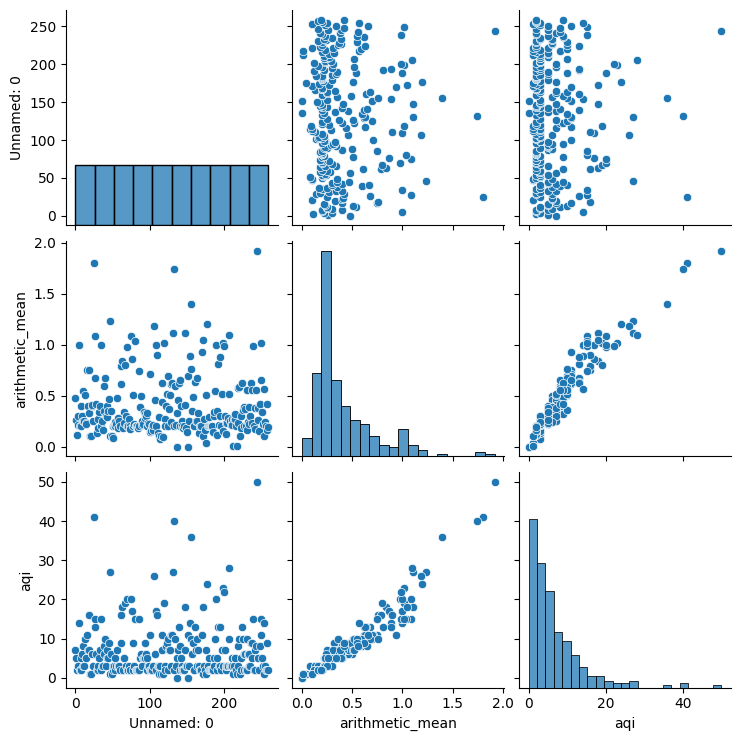

In [3]:
import seaborn as sns

sns.pairplot(df)



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X=df[['arithmetic_mean']]
y=df['aqi']



In [7]:
# Step 2: Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 3: Create a linear regression model
model = LinearRegression(fit_intercept=True)

# Step 4: Train the model
model.fit(X_train, y_train)




LinearRegression()

In [9]:
# Use the fitted model to make predictions
y_pred = model.predict(X_test)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, explained_variance_score
from sklearn.model_selection import cross_val_score


# Evaluate performance for model_1
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
rmse=np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)



# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)



# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)


# Calculate Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R-squared:", adjusted_r_squared)

print("Mean Absolute Percentage Error (MAPE):", mape)

print("Explained Variance Score:", explained_variance)



print("Mean Absolute Error (MAE):", mae)

print("MSE : ", mse)
print("r2 : ", r2)
print("RMSE : ",rmse)


Adjusted R-squared: 0.950232027273515
Mean Absolute Percentage Error (MAPE): 0.2567383083064916
Explained Variance Score: 0.9551145821460565
Mean Absolute Error (MAE): 1.2355809337156531
MSE :  3.0991663953617232
r2 :  0.951207869875995
RMSE :  1.7604449424397581


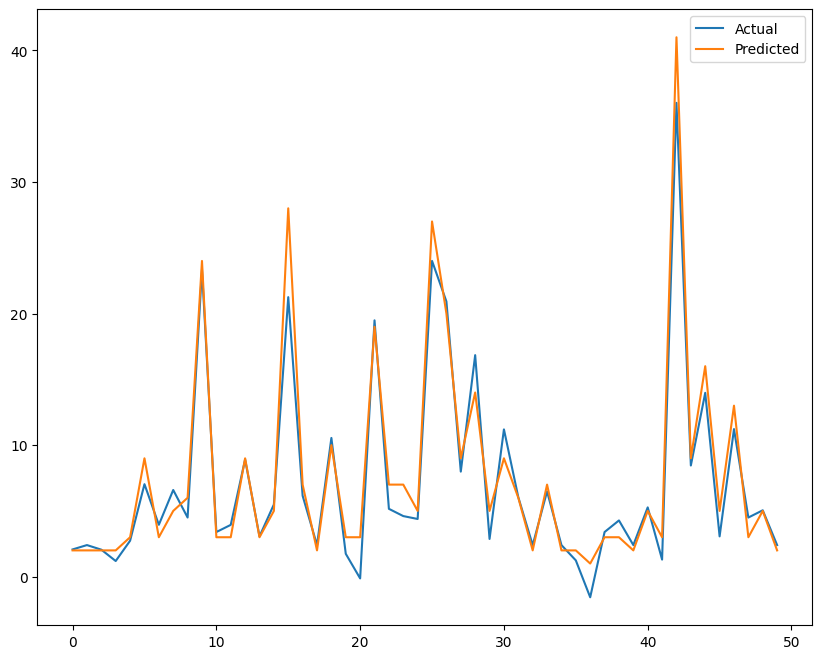

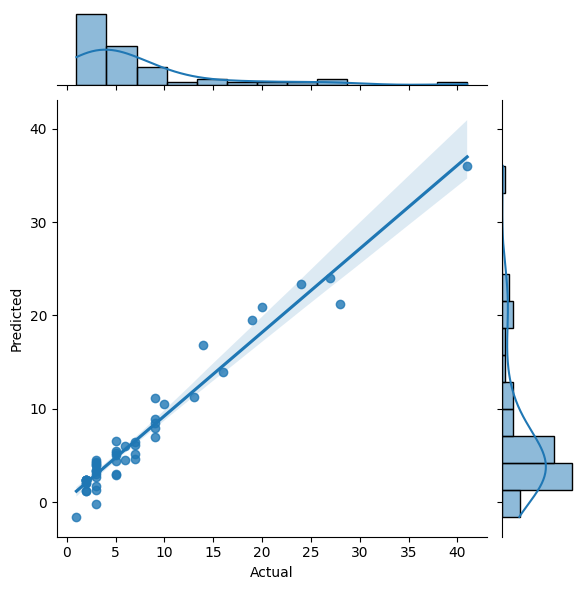

In [11]:
import matplotlib.pyplot as plt


# Assuming y_test and y_pred2 are your actual and predicted values
y_test_1d = np.ravel(y_test)
y_pred_1d = np.ravel(y_pred)

test = pd.DataFrame({'Predicted':y_pred_1d,'Actual':y_test_1d})
fig= plt.figure(figsize=(10,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

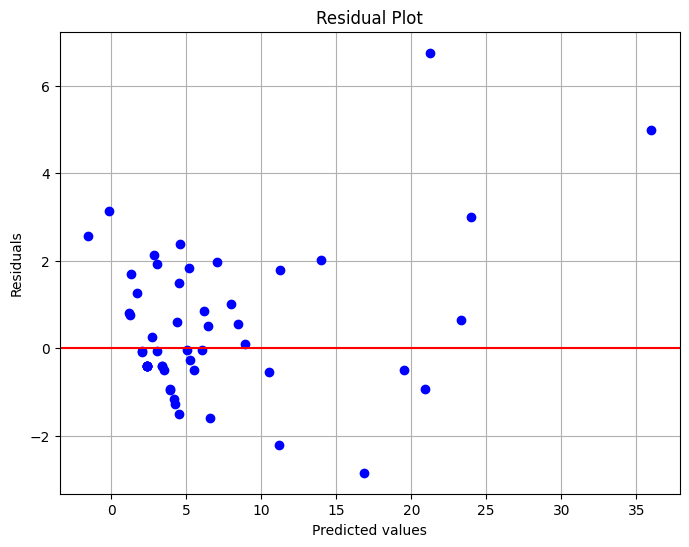

In [12]:
# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals against the predicted values
plt.figure(figsize=(8, 6))
plt.plot(y_pred, residuals, 'bo')  # Plot residuals against predicted values
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

In [13]:
from scipy import stats
from sklearn.linear_model import LinearRegression

# Assuming X and y are your feature matrix and target vector

# Calculate Z-scores for each feature
z_scores = np.abs(stats.zscore(X))

# Define a threshold to identify outliers (e.g., Z-score > 3)
threshold = 3

# Remove rows with outliers
X_cleaned = X[(z_scores < threshold).all(axis=1)]
y_cleaned = y[(z_scores < threshold).all(axis=1)]

# Create and train a linear regression model using the cleaned dataset
model = LinearRegression()
model.fit(X_cleaned, y_cleaned)

# Optionally, you can print the indices of the removed outliers
outlier_indices = np.where((z_scores >= threshold).any(axis=1))[0]
print("Indices of removed outliers:", outlier_indices)

Indices of removed outliers: [ 25 132 155 244]


In [14]:
# Step 2: Split your data
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

In [15]:
# Use the fitted model to make predictions
y_pred = model.predict(X_test)

In [16]:
# Step 3: Create a linear regression model
model1 = LinearRegression(fit_intercept=True)

# Step 4: Train the model
model1.fit(X_train, y_train)


LinearRegression()

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, explained_variance_score
from sklearn.model_selection import cross_val_score


# Evaluate performance for model_1
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
rmse=np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)



# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)



# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)


# Calculate Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R-squared:", adjusted_r_squared)

print("Mean Absolute Percentage Error (MAPE):", mape)

print("Explained Variance Score:", explained_variance)



print("Mean Absolute Error (MAE):", mae)

print("MSE : ", mse)
print("r2 : ", r2)
print("RMSE : ",rmse)


Adjusted R-squared: 0.8906066954617075
Mean Absolute Percentage Error (MAPE): 0.21090753957441455
Explained Variance Score: 0.8927549220601453
Mean Absolute Error (MAE): 1.4428685481343146
MSE :  3.9781438725077587
r2 :  0.8927516622173602
RMSE :  1.9945284837544333


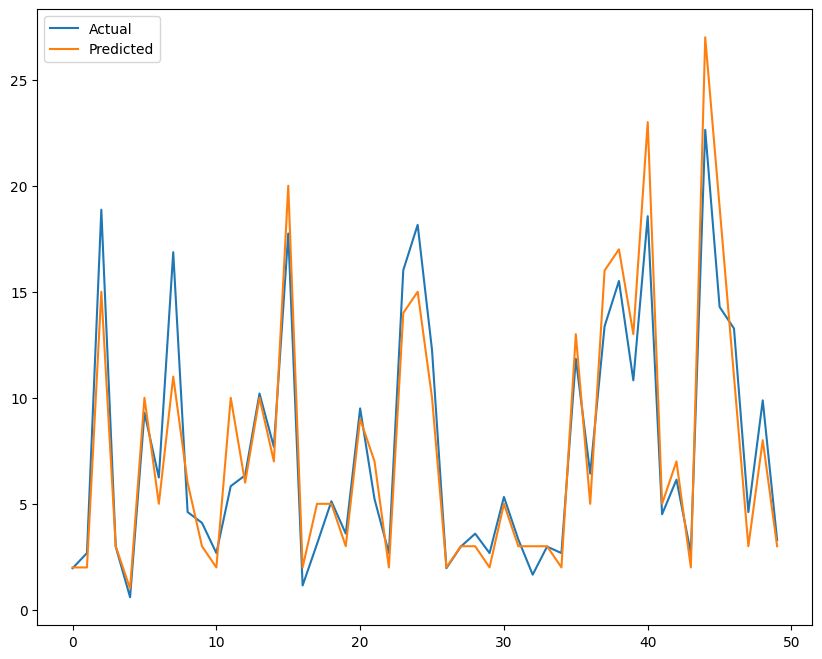

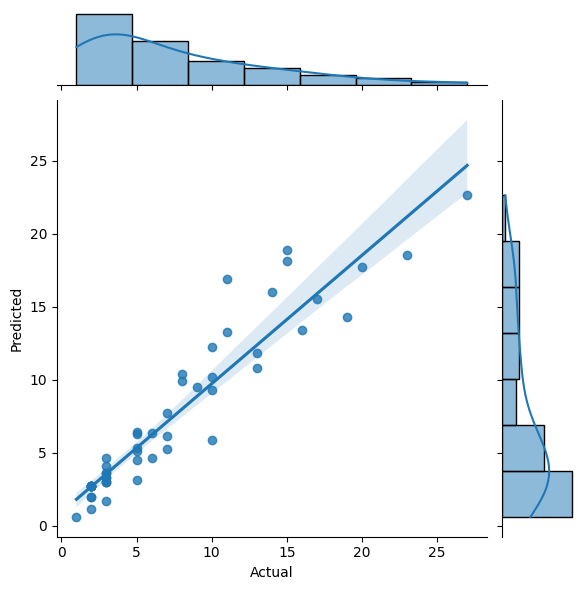

In [18]:
import matplotlib.pyplot as plt


# Assuming y_test and y_pred2 are your actual and predicted values
y_test_1d = np.ravel(y_test)
y_pred_1d = np.ravel(y_pred)

test = pd.DataFrame({'Predicted':y_pred_1d,'Actual':y_test_1d})
fig= plt.figure(figsize=(10,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

# CLUSTERING

In [19]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and 'column_name' is the name of the column you want to encode

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the specified column
df['state_name_encoded'] = label_encoder.fit_transform(df['state_name'])

# Convert the encoded values to float
df['state_name_encoded'] = df['state_name_encoded'].astype(float)


# Print the mapping of original categories to encoded values
print("Mapping of original categories to encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Mapping of original categories to encoded values:
Alabama: 0
Alaska: 1
Arizona: 2
Arkansas: 3
California: 4
Colorado: 5
Connecticut: 6
Delaware: 7
District Of Columbia: 8
Florida: 9
Georgia: 10
Hawaii: 11
Idaho: 12
Illinois: 13
Indiana: 14
Iowa: 15
Kansas: 16
Kentucky: 17
Louisiana: 18
Maine: 19
Maryland: 20
Massachusetts: 21
Michigan: 22
Minnesota: 23
Mississippi: 24
Missouri: 25
Montana: 26
Nebraska: 27
Nevada: 28
New Hampshire: 29
New Jersey: 30
New Mexico: 31
New York: 32
North Carolina: 33
North Dakota: 34
Ohio: 35
Oklahoma: 36
Oregon: 37
Pennsylvania: 38
Puerto Rico: 39
Rhode Island: 40
South Carolina: 41
South Dakota: 42
Tennessee: 43
Texas: 44
Utah: 45
Vermont: 46
Virginia: 47
Washington: 48
West Virginia: 49
Wisconsin: 50
Wyoming: 51


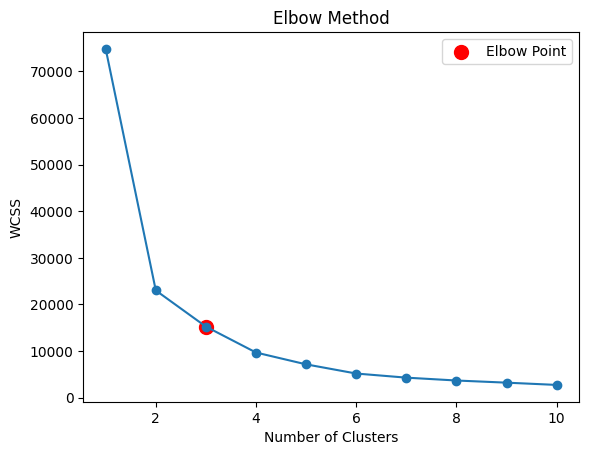

In [20]:
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates



# Extracting longitude, latitude, and median house value features
aqi = df['aqi']  # Longitude
arithmetic_mean = df['arithmetic_mean']  # Latitude
state_name = df['state_name_encoded']  # Median house value

# Stack the features together
X_selected_features = np.column_stack((aqi,arithmetic_mean,state_name))

# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_selected_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Highlight the elbow point with a dot
elbow_point = 3
plt.scatter(elbow_point, wcss[elbow_point - 1], c='red', s=100, label='Elbow Point')
plt.legend()

plt.show()              

In [21]:
kmeans= KMeans(n_clusters=3) # number of clusters must be specified
model = kmeans.fit(X)
model

# Get cluster labels
cluster_labels_3= kmeans.labels_
cluster_labels_3

array([0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2,
       2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2,
       2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [22]:
centers = model.cluster_centers_
centers

array([[0.61077616],
       [0.23421385],
       [1.13064954]])

IndexError: index 1 is out of bounds for axis 1 with size 1

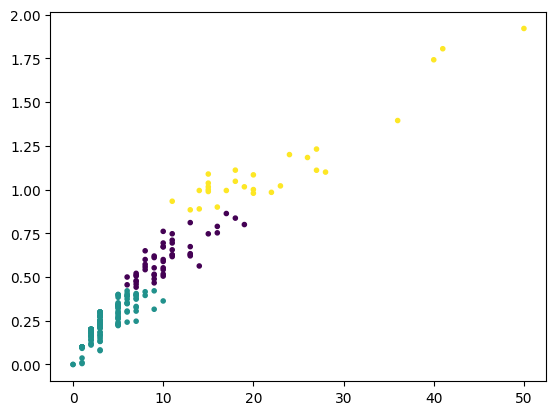

In [29]:
# Visualize the clusters (for latitude and longitude)
plt.scatter(df['aqi'], df['arithmetic_mean'], c=cluster_labels_3, cmap='viridis', marker='.')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=300)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-means Clustering of AQI (Arithmetic Mean vs AQI)')
plt.show()

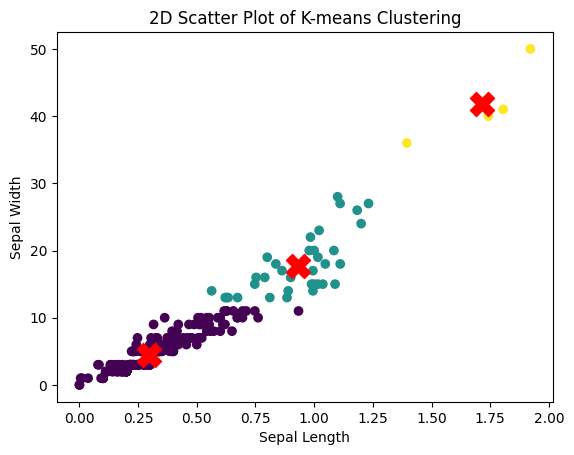

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

# Load the dataset

X = df[['arithmetic_mean', 'aqi']]  # Extracting the first two columns: sepal length and sepal width

# Convert to DataFrame for better handling
data = pd.DataFrame(X, columns=['arithmetic_mean', 'aqi'])

# Fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 2D Scatter plot
plt.scatter(data['arithmetic_mean'], data['aqi'], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='X')
plt.xlabel('Arithmetic Mean of CO & PPM')
plt.ylabel('AQI')
plt.title("2D Scatter Plot of K-means Clustering")
plt.show()


In [36]:
# Add cluster labels to the DataFrame
data['Cluster'] = kmeans.labels_


In [37]:
# Calculate the mean and standard deviation of each feature for each cluster
cluster_profile = data.groupby('Cluster').agg(['mean', 'std'])
print(cluster_profile)

        arithmetic_mean                  aqi          
                   mean       std       mean       std
Cluster                                               
0              0.295836  0.162105   4.384615  2.831886
1              0.930885  0.176157  17.742857  4.474390
2              1.715790  0.226499  41.750000  5.909033


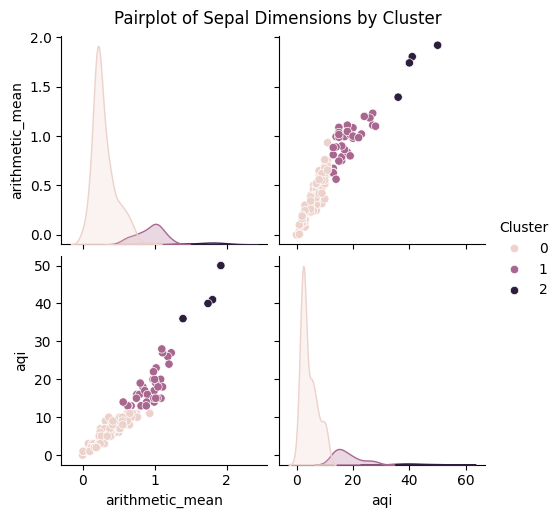

In [38]:
import seaborn as sns

# Create a pairplot colored by cluster labels
sns.pairplot(data, hue='Cluster', diag_kind='kde')
plt.suptitle("Pairplot of Sepal Dimensions by Cluster", y=1.02)
plt.show()


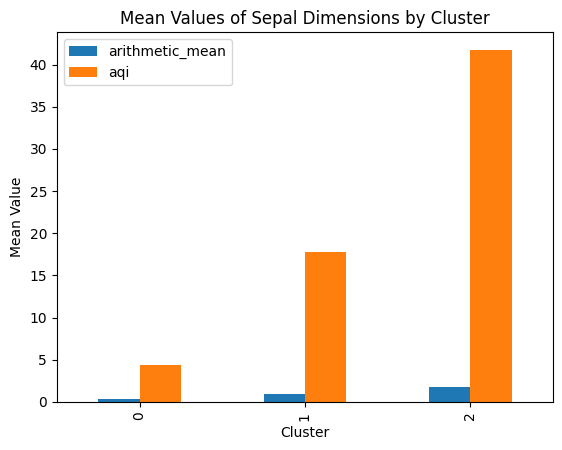

In [39]:
# Plot the means of each feature for each cluster
cluster_means = cluster_profile.xs('mean', axis=1, level=1)
cluster_means.plot(kind='bar')
plt.title('Mean Values of Sepal Dimensions by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.show()